In [3]:
%matplotlib inline

In [4]:
import numpy as np
from scipy.spatial import distance
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Clustering Analysis. How Different Metrics Affect Clustering Results Using K-means Algorithm
## Author: Martin Topalov

### Abstract
In this thesis we will see that we get different results using the same algorithm (K-means) but with different distance metrics. We will apply k-means on randomly generated values and also on a real-world scenario, using Iris dataset for our purposes from *sklearn.datasets*. We will find out if, how and why the different metrics affect clustering results. The results will be visualized showing us clearly, with varied colors, the distinctions. Also we will analyze the distance metrics we are going to use. They will be the following: Euclidean distance, Canberra distance and Cosine distance. The cases in which these metrics are used will be considered and explained with examples.

### Cluster analysis
Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including machine learning, pattern recognition, image analysis, information retrieval, bioinformatics, data compression, and computer graphics.

### Cluster Points
The definition of a cluster point $ c $ says that no matter how small $ \delta > 0 $ is, we can always find a point other than $ c $ in any $ \delta $-neighbourhood $ \bigvee_\delta(c) $, or equivalently, every open interval around the point $ c $ will contain infinitely many elements of the set $ A $. Alternatively, we can prove that a specific point $ c $ is a cluster point of the set $ A $ if there exists a sequence $ a_n $ from $ A $ such that $ a_n≠c $ $ ∀n∈N $ and $ lim_{n\rightarrow\infty} a_n=c $.

### K-means clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:
1. The centroids of the K clusters, which can be used to label new data
2. Labels for the training data (each data point is assigned to a single cluster)

To see how k-means clustering depends on the initialization we will first take a look at the algorithm.

### K-means clustering algorithm

The Κ-means clustering algorithm uses iterative refinement to produce a final result. The algorithm inputs are the number of clusters Κ and the data set. The data set is a collection of features for each data point. The algorithms starts with initial estimates for the Κ centroids, which can either be randomly generated or randomly selected from the data set. The algorithm then iterates between two steps:
1. Data assigment step:

    Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, based on the squared Euclidean distance. More formally, if $ c_i $ is the collection of centroids in set $ C $, then each data point $ x $ is assigned to a cluster based on 
    
    $$ \underset{c_i \in C}{\arg\min} \; dist(c_i,x)^2 $$ 
    
    where $ dist( · ) $ is the standard $ (L_2) $ Euclidean distance. Let the set of data point assignments for each $ i^{th} $ cluster centroid be $ S_i $.

2. Centroid update step:
    
    In this step, the centroids are recomputed. This is done by taking the mean of all data points assigned to that centroid's cluster.
    
    $$c_i=\frac{1}{|S_i|}\sum_{x_i \in S_i x_i}$$
    
The algorithm iterates between steps one and two until a stopping criteria is met (i.e., no data points change clusters, the sum of the distances is minimized, or some maximum number of iterations is reached).

In [15]:
"""
Implements K-means algorithm.

@param X - 2D array
@param K - number of clusters

@return centroids, cluster_assignments

"""

def k_means(X, K, name):
    nrow = X.shape[0]
    ncol = X.shape[1]

    # pick K random data points as initial centroids
    initial_centroids = np.random.choice(nrow, K, replace=False)
    centroids = X[initial_centroids]
    
    centroids_old = np.zeros((K, ncol))
    cluster_assignments = np.zeros(nrow)

    while (centroids_old != centroids).any():
        centroids_old = centroids.copy()

        # compute distances between data points and centroids
        dist_matrix = distance.cdist(X, centroids, name)
        
        # step 1: find closest centroid for each data point
        for i in np.arange(nrow):
            d = dist_matrix[i]   
            closest_centroid = (np.where(d == np.min(d)))[0][0]

            # associate data point with closest centroid
            cluster_assignments[i] = closest_centroid

        # step 2: recompute centroids
        for k in np.arange(K):
            Xk = X[cluster_assignments == k]
            centroids[k] = np.apply_along_axis(np.mean, axis=0, arr=Xk)

    return (centroids, cluster_assignments)

Generate data.

In [16]:
"""
Generate random Xs and Ys, for testing data, and concatenate them.

"""

x_cluster_1 = np.arange(2, 6, 0.01)
y_cluster_1 = 1 + (np.random.normal(0, 1, len(x_cluster_1))) * 2

x_cluster_2 = np.arange(14, 18, 0.01)
y_cluster_2 = 1 + (np.random.normal(0, 1, len(x_cluster_2))) * 2

x_cluster_3 = np.arange(7, 12, 0.01)
y_cluster_3 = 14 + (np.random.normal(0, 1, len(x_cluster_3))) * 2

x = np.concatenate([x_cluster_1, x_cluster_2, x_cluster_3])
y = np.concatenate([y_cluster_1, y_cluster_2, y_cluster_3])

data = np.column_stack((x,y))

Apply k-means to data. We use 3 different metrics, euclidean, hamming and cosine, to show how different the results are, applying each of them to k-means algorithm.
* **Euclidean distance** - The Euclidean distance is a distance measure between two points or or vectors in a two- or multidimensional (Euclidean) space based on Pythagoras' theorem. The distance is calculated by taking the square root of the sum of the squared pair-wise distances of every dimension. 

$$ \sqrt{\sum_{i=1}^n (x_i-y_i)^2} $$ 

   In this case we will use 2D space and given points $ A (x_A; y_A) $ and $ B(x_B; y_B) $, therefore the distance is 

$$ d = \sqrt{(x_B-x_A)^2 + (y_B-y_A)^2} = \sqrt{(\Delta x)^2 + (\Delta y)^2} $$

* **Canberra distance** - A measure of similarity and dissimilarity between groups. Computes the Canberra distance between the points. The Canberra distance between two points u and v is

$$ d(u,v)=\sum_i\frac {\left|u_i-v_i\right|}{\left|u_i\right|+\left|v_i\right|} $$
* **Cosine distance** - Computes the cosine distance between vectors u and v,

$$ 1 - \frac {\pmb u \cdot \pmb v}{||\pmb u||_2 \cdot ||\pmb v||_2} $$

where $ ||\pmb *||_2 $ is the 2-norm of its argument $ \pmb * $, and $ \pmb u \cdot \pmb v $ is the dot product of $ u $ and $ v $.

In [17]:
"""
Set number of clusters, and distance metric.

Call k_means function.

"""

K = 3
k_means_result_euclidean = k_means(data, K, 'euclidean')
k_means_result_canberra = k_means(data, K, 'canberra')
k_means_result_cosine = k_means(data, K, 'cosine')

centroids_euclidean = k_means_result_euclidean[0]
centroids_canberra = k_means_result_canberra[0]
centroids_cosine = k_means_result_cosine[0]

cluster_assignments_euclidean = (k_means_result_euclidean[1]).tolist()
cluster_assignments_canberra = (k_means_result_canberra[1]).tolist()
cluster_assignments_cosine = (k_means_result_cosine[1]).tolist()

Plot clustering results.

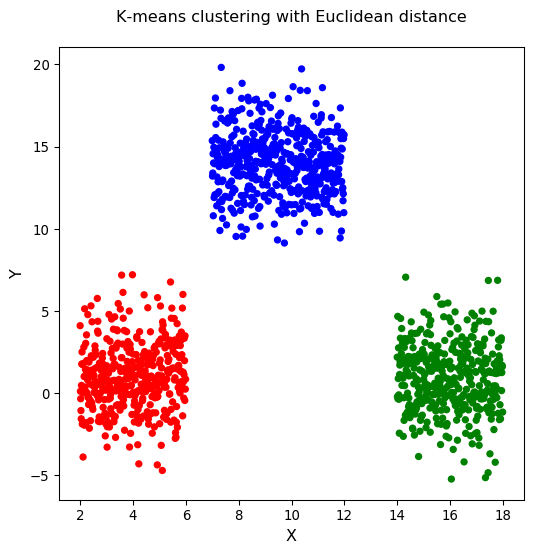

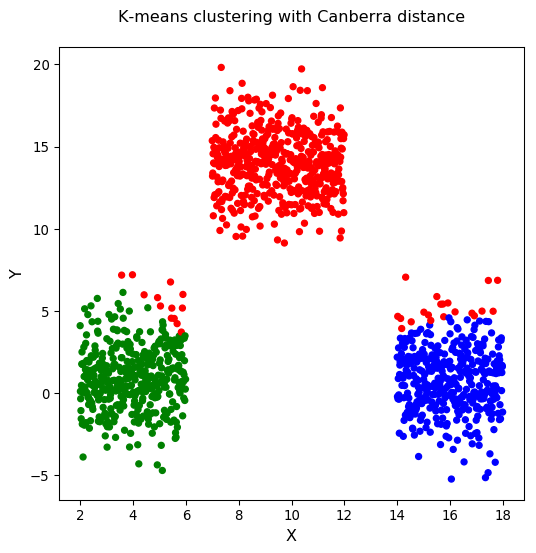

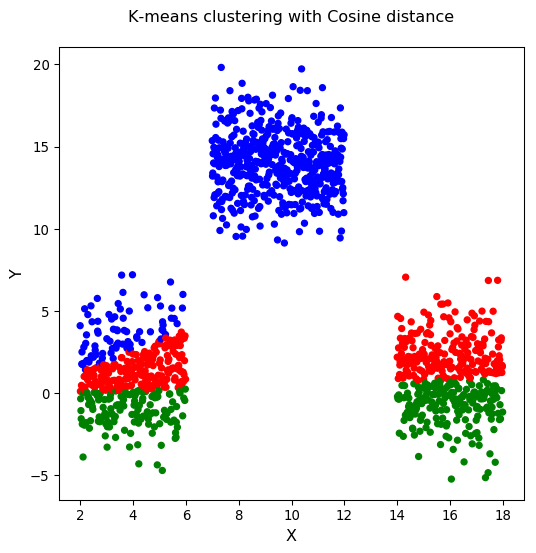

In [18]:
"""
Plots results of random data and paint every cluster in different color.

"""

colors = ['r', 'g', 'b', 'y']
f = lambda x: colors[int(x)]
cluster_assignments_euclidean = list(map(f, cluster_assignments_euclidean))
cluster_assignments_canberra = list(map(f, cluster_assignments_canberra))
cluster_assignments_cosine = list(map(f, cluster_assignments_cosine))

my_dpi = 96

#Euclidean distance
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('K-means clustering with Euclidean distance\n', fontsize=12)
plt.scatter(data[:,0], data[:,1], color=cluster_assignments_euclidean, s=20)
plt.show()

#Canberra distance
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('K-means clustering with Canberra distance\n', fontsize=12)
plt.scatter(data[:,0], data[:,1], color=cluster_assignments_canberra, s=20)
plt.show()

#Cosine distance
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('K-means clustering with Cosine distance\n', fontsize=12)
plt.scatter(data[:,0], data[:,1], color=cluster_assignments_cosine, s=20)
plt.show()

We see that there are differences between results. With this analysis we prove that the different metrics affect clustering results. This is due to the fact that each distance metric uses different definition for "distance". For example Euclidean distance: each cluster has a well-defined centroid i.e., average across all the points in the cluster. Each cluster is represented by its centroid and the distance between clusters is equal to distance between centroids. At non-euclidean distances the only "locations" we can talk about are the points themselves i.e., there is no "average" of two points. 
1. Approach 1: clustroid = point "closest" to other points. The clustroid is treated as if it were centroid, when computing intercluster distances. And there is some possible meanings of "closest" point:
    * Smallest maximum distance to the other points.
    * Smallest average distance to other points.
    * Smallest sumof squares of distances to other points.
2. Approach 2: intercluster distance = minimum of the distances between any two points, one from each cluster.
3. Approach 3: pick a notion of "cohesion" of clusters, e.g., maximum distance from the clustroid. Merge clusters whose union is most cohesive.



### When to use Euclidean distance?
The Euclidean distance is appropriate when there are continuous numerical variables and we want to reflect absolute distances. This distance takes into account every variable and doesn’t remove redundancies, so if we had three variables that explain the same (are correlated), we would weight this effect by three. Moreover, this distance is not scale invariant, so generally we have to scale previously to use the distance.

Example ecology: We have different observations from many localities, of which the experts have taken samples of some microbiological, physical and chemical factors. We want to find patterns in ecosystems. These factors have a high correlation, but we know everyone is relevant, so we don’t want to remove these redundancies. We use the Euclidean distance with scaled data to avoid the effect of units.

### When to use Canberra distance?

It’s often used to sort plants and animals into groups that are more closely or distantly related to each other. Although it can be used outside biology too. Let’s say you want to separate the sheep from the goats in your large herd. You might need to consider several criteria to make your decision:
* Binary data – has a beard/doesn’t have a beard.
* Ordered categorical data – hair very woolly/ hair moderately woolly/ hair not woolly.
* Quantitative data – a measurement like weight in kilograms or height in centimetres.

The Canberra distance is a way to use all these criteria together to separate individuals according to how similar or dissimilar they are. In our case, we’ll separate the herd according to how sheepy or goaty they are.

If you’ve got a large herd, you’d start by measuring all the criteria for each animal. Then you’d need some statistics, including the Canberra distance, to cluster the data into groups of animals that were similar across several characteristics.

### When to use Cosine distance?

Cosine similarity is generally used as a metric for measuring distance when the magnitude of the vectors does not matter. This happens for example when working with text data represented by word counts. We could assume that when a word (e.g. science) occurs more frequent in document 1 than it does in document 2, that document 1 is more related to the topic of science. However, it could also be the case that we are working with documents of uneven lengths (Wikipedia articles for example). Then, science probably occurred more in document 1 just because it was way longer than document 2. Cosine similarity corrects for this.

Text data is the most typical example for when to use this metric. However, you might also want to apply cosine similarity for other cases where some properties of the instances make so that the weights might be larger without meaning anything different. Sensor values that were captured in various lengths (in time) between instances could be such an example.

Let's apply clustering analysis for a real-world scenario. We will generate a small dataset containing flowers (Iris) data.

In [7]:
iris = load_iris()

We will get the data of cloums "petal length" and "petal width" to cluster the Iris species.

In [8]:
#data = iris.data[:,0:2]
#print(iris.data[:,0:2].shape[0])
#print(iris.data[:,0:2].shape[1])

irisData = iris.data[:,2:4]
#print(iris.data[:2])

Apply k-means to Iris data. In Iris dataset there are 3 types of flowers for that reason we will we will use 3 clusters (K=3).


In [9]:
"""
Set number of clusters, and distance metric.

Call k_means function.

"""

K = 3
k_means_result_euclidean = k_means(irisData, K, 'euclidean')
k_means_result_canberra = k_means(irisData, K, 'canberra')
k_means_result_cosine = k_means(irisData, K, 'cosine')

centroids_euclidean = k_means_result_euclidean[0]
centroids_canberra = k_means_result_canberra[0]
centroids_cosine = k_means_result_cosine[0]

cluster_assignments_euclidean = (k_means_result_euclidean[1]).tolist()
cluster_assignments_canberra = (k_means_result_canberra[1]).tolist()
cluster_assignments_cosine = (k_means_result_cosine[1]).tolist()

Plot clustering results.

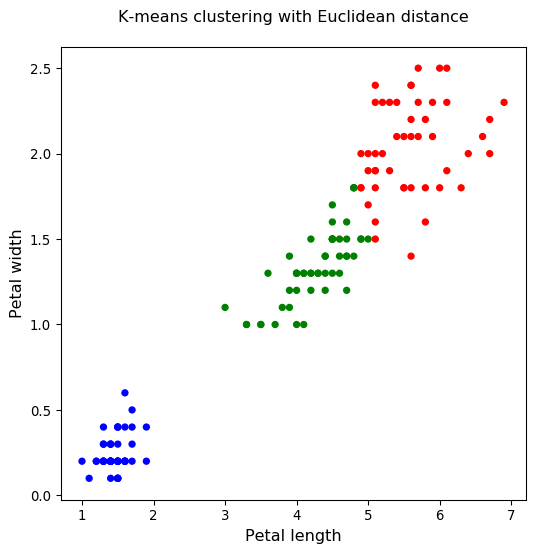

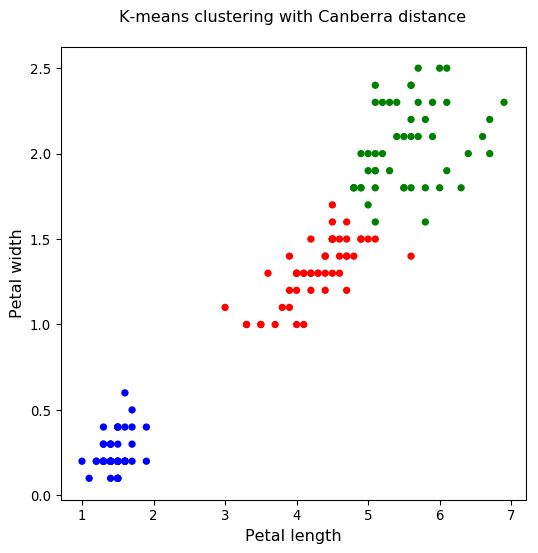

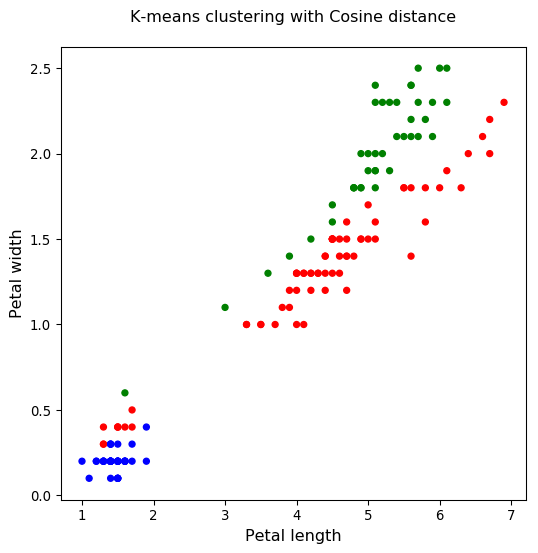

In [10]:
"""
Plots results of Iris data and paint every cluster in different color.

"""

colors = ['r', 'g', 'b', 'y']
f = lambda x: colors[int(x)]
cluster_assignments_euclidean = list(map(f, cluster_assignments_euclidean))
cluster_assignments_canberra = list(map(f, cluster_assignments_canberra))
cluster_assignments_cosine = list(map(f, cluster_assignments_cosine))

my_dpi = 96

#Euclidean distance
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.xlabel('Petal length', fontsize=12)
plt.ylabel('Petal width', fontsize=12)
plt.title('K-means clustering with Euclidean distance\n', fontsize=12)
plt.scatter(irisData[:,0], irisData[:,1], color=cluster_assignments_euclidean, s=20)
plt.show()

#Canberra distance
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.xlabel('Petal length', fontsize=12)
plt.ylabel('Petal width', fontsize=12)
plt.title('K-means clustering with Canberra distance\n', fontsize=12)
plt.scatter(irisData[:,0], irisData[:,1], color=cluster_assignments_canberra, s=20)
plt.show()

#Cosine distance
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.xlabel('Petal length', fontsize=12)
plt.ylabel('Petal width', fontsize=12)
plt.title('K-means clustering with Cosine distance\n', fontsize=12)
plt.scatter(irisData[:,0], irisData[:,1], color=cluster_assignments_cosine, s=20)
plt.show()

### Conclusion

In this thesis we saw that we get different results using the same algorithm but with different distance metrics. We apply k-means on randomly generated values and also on a real-world scenario using Iris dataset for our purposes. We came to the conclusion that the different metrics affect clustering results because of different definition for "distance" which each distance metric uses. The ploted data showed us clearly, with varied colors the distinctions. Also we analyzed the distance metrics we used. They were the following Euclidean distance, Canberra distance and Cosine distance. The cases in which these metrics were used were considered and were explained with examples.


### References

[1] https://en.wikipedia.org/wiki/Cluster_analysis

[2] http://mathonline.wikidot.com/cluster-points

[3] https://www.datascience.com/blog/k-means-clustering

[4] https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html

[5] https://web.stanford.edu/class/cs345a/slides/12-clustering.pdf

[6] https://blog.csiro.au/going-nuts-with-the-canberra-distance/

[7] https://cmry.github.io/notes/euclidean-v-cosine